In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Bài 1: Tính các sai số MAE, MSE, R^2

In [10]:
#1. Đọc dữ liệu từ file CSV
data = pd.read_csv("Life Expectancy Data.csv")
df1 = data.copy()

#2. Điền giá trị thiếu ở các cột (trừ cột "Life expectancy")
for column in df1.columns:
    if column == 'Life expectancy ': continue  # Không điền cho cột nhãn vì điền sẽ sai
    if df1[column].dtype == 'object':
        df1[column].fillna(df1[column].mode()[0], inplace=True)
        # Chuyển đổi cột có dạng chuỗi thành dạng số bằng one-hot encoding
        df1 = pd.get_dummies(df1, columns=[column])
    else:
        df1[column].fillna(round(df1[column].mean(), 2), inplace=True)

#3. Tách tập dữ liệu thành có nhãn và không có nhãn
labeled_df = df1[df1['Life expectancy '].notnull()]
unlabeled_df = df1[df1['Life expectancy '].isnull()]

#4. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = labeled_df.drop("Life expectancy ", axis=1)
y = labeled_df["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#5. Xây dựng mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#6. Dự đoán tuổi thọ trung bình trên tập kiểm tra
y_pred = model.predict(X_test)

#7. Tính các sai số MAE, MSE và R^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R^2 Score:", round(r2, 2))


Mean Absolute Error (MAE): 1.32
Mean Squared Error (MSE): 4.43
R^2 Score: 0.95


## Bài 2: So sánh các giá trị sai số sau khi chuẩn hóa dữ liệu và trước khi chuẩn hóa dữ liệu

In [11]:
from sklearn.preprocessing import StandardScaler

#2. Chuẩn hóa dữ liệu bằng phương pháp z-score standardization
scaler = StandardScaler() #Khởi tạo đối tượng StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#3. Huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện đã chuẩn hóa
model.fit(X_train_scaled, y_train)

#4. Dự đoán nhãn trên tập kiểm tra đã chuẩn hóa
y_pred = model.predict(X_test_scaled)

#5. Xuất ra các sai số sau chuẩn hóa
mae_after_scaling = mean_absolute_error(y_test, y_pred)
mse_after_scaling = mean_squared_error(y_test, y_pred)
r2_after_scaling = r2_score(y_test, y_pred)
print('MAE after scaling:', mae_after_scaling)
print("MSE after scaling:", mse_after_scaling)
print("r2 after scaling:", r2_after_scaling)


MAE after scaling: 1.284825984246529
MSE after scaling: 4.315718798728969
r2 after scaling: 0.9516957076238186


## Bài 3: Sử dụng kỹ thuật cross validation để tối ưu hóa các chỉ số

In [12]:
# Chuẩn hóa dữ liệu bằng phương pháp z-score standardization
X_scaled = scaler.fit_transform(X)

# Huấn luyện mô hình hồi quy tuyến tính và thực hiện cross-validation với k=5
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

# In ra kết quả cross validation
print('Cross validation scores:', scores)
print('Mean R^2:', scores.mean())

Cross validation scores: [-9.77318148e+26 -2.71135809e+25 -2.90279935e+25 -8.45450922e+25
 -1.11094338e+26]
Mean R^2: -2.4581983047731272e+26


## Bài 4: Biểu diễn dữ liệu tuổi thọ của từng quốc gia tới năm 2030


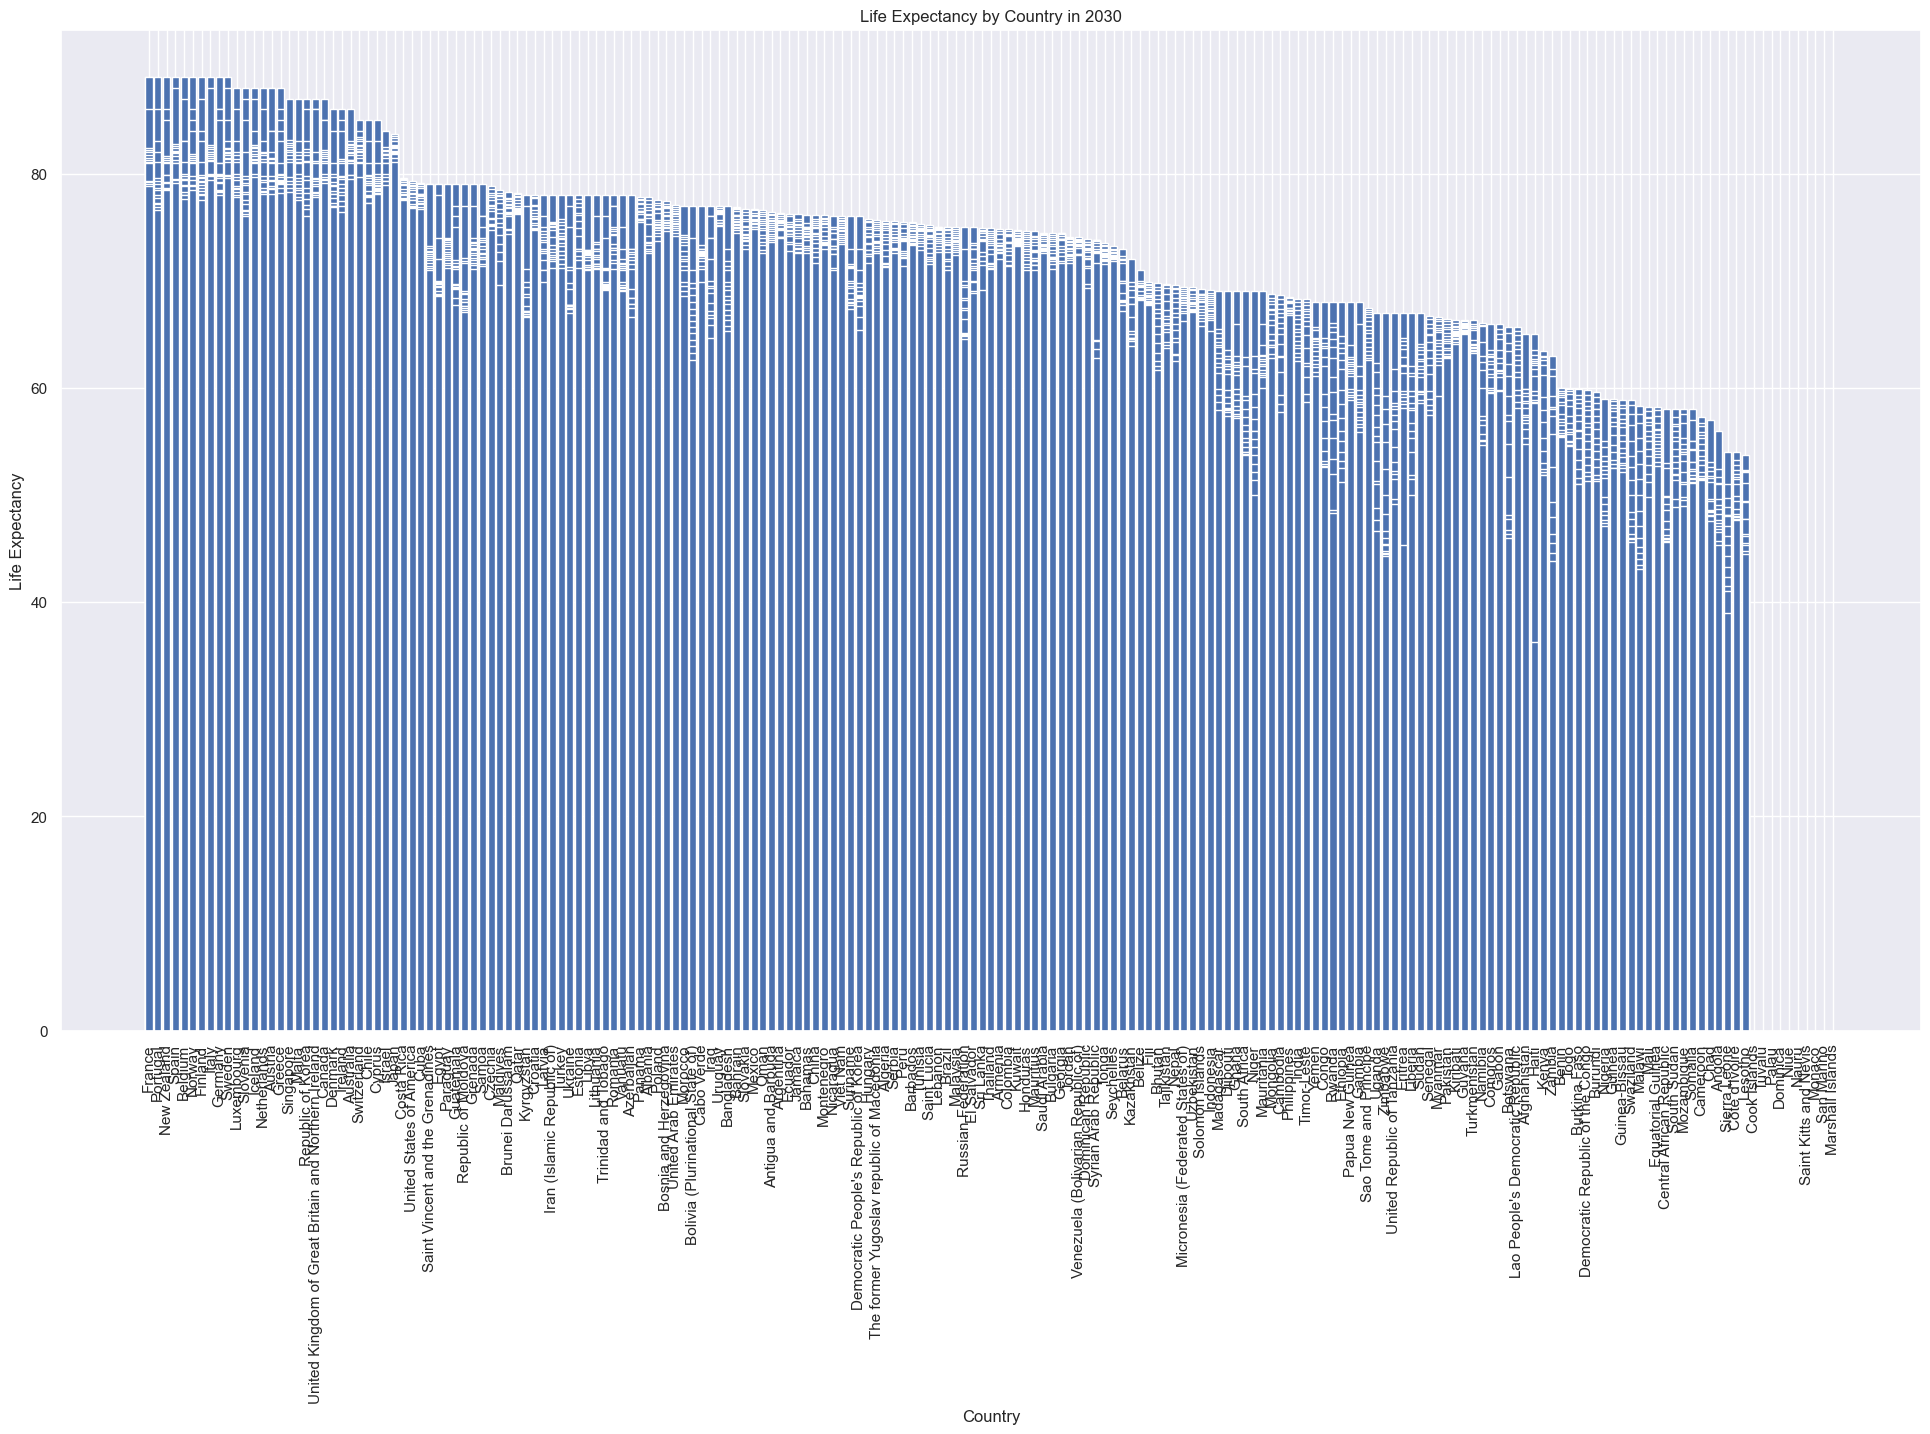

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thay thế các giá trị NaN trong cột 'Life expectancy ' bằng 0
data['Life expectancy '] = data['Life expectancy '].fillna(0)

# Lọc dữ liệu cho năm 2030
data_2030 = data[data['Year'] <= 2030]

# Sắp xếp dữ liệu theo tuổi thọ giảm dần
data_2030 = data_2030.sort_values(by='Life expectancy ', ascending=False)

# Tạo biểu đồ cột
plt.bar(data_2030['Country'], data_2030['Life expectancy '])
plt.xticks(rotation=90)
sns.set(rc= {'figure.figsize': (24, 13)})
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Country in 2030')
plt.show()